In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %reload_ext autoreload

### Link to Source Code 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/my-blog-post-06-unsupervised-learning)is a link to the source code for this post.

### Link to reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-image-processing.html) is a link to the main reference we use as we implement this post.

# Part I: Image Compression with the Singular Value Decomposition
We use the image of a cat which can be accessed here for free download: [www.pexels.com](https://www.pexels.com/photo/selective-focus-photography-of-orange-tabby-cat-1170986/). I have already downloaded a copy of an image of a tabby cat, and I have stored it in the same directory as this jupyter notebook.

In [3]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(42)
import PIL
from PIL import Image
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))
# url = "https://images.pexels.com/photos/1170986/pexels-photo-1170986.jpeg?cs=srgb&dl=pexels-evg-kowalievska-1170986.jpg&fm=jpg"
# myimg = read_image(url)

In [4]:
# open the image from working directory
img = Image.open("./tabby_cat.png")
print(f"format: {img.format}")
print(f"size: {img.size}")
print(f"mode: {img.mode}")
# convert PIL images into numpy arrays.
myimg = np.asarray(img)

format: JPEG
size: (1771, 2657)
mode: RGB


[Text(0.5, 1.0, 'greyscale')]

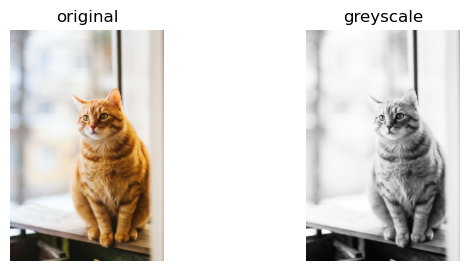

In [5]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(myimg)

axarr[0].imshow(myimg)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

In [6]:
print(grey_img.shape[0])
print(grey_img.shape[1])

2657
1771


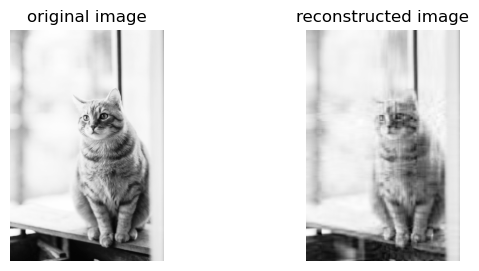

In [23]:
from hidden_images import svd
svd1 = svd()
k = 18 
A_ = svd1.reconstruct(grey_img, k)
svd1.compare_images(grey_img, A_)

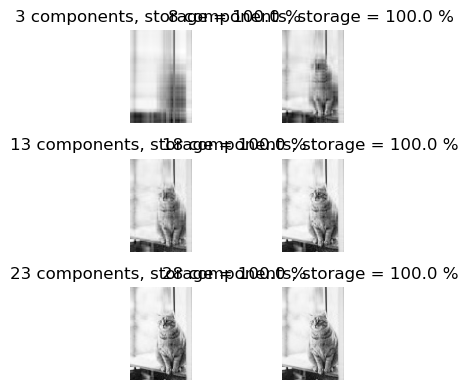

In [22]:
svd1.experiment(grey_img) 

# Part II: Spectral Community Detection

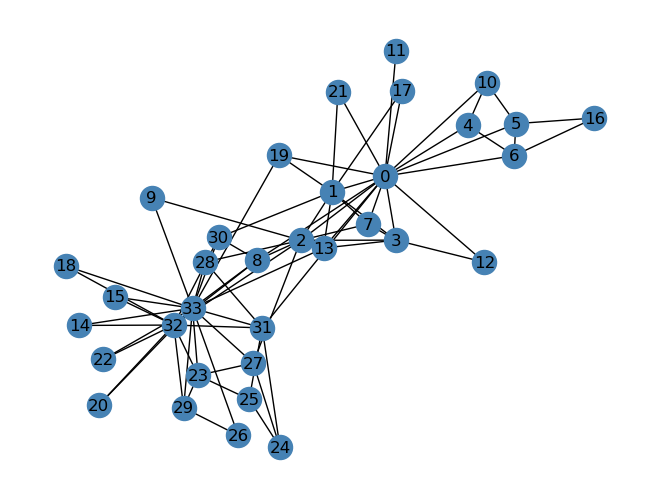

In [ ]:
import networkx as nx
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

We need to return a vector of binary labels to split the graph.

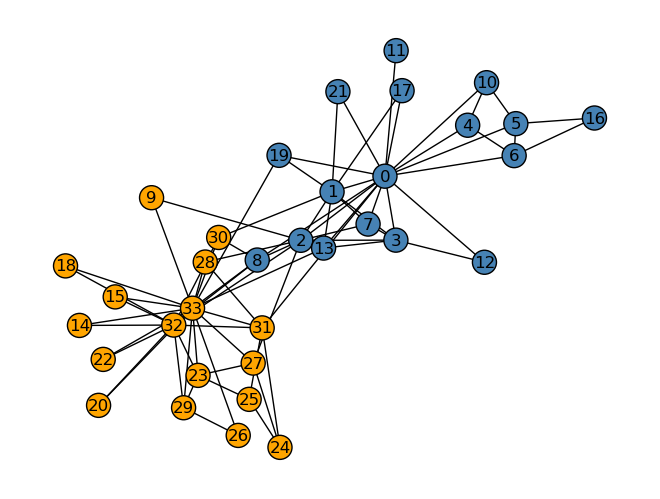

In [ ]:
clubs = nx.get_node_attributes(G, "club")

nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

# Implementing Laplacian Spectral Clustering 

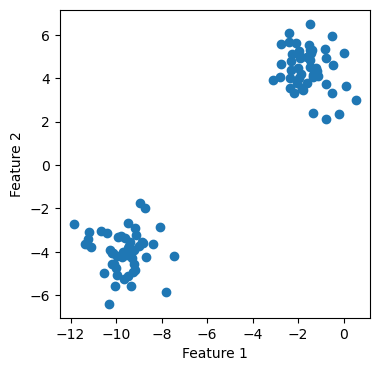

In [ ]:
from sklearn.datasets import make_blobs, make_circles
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(12345)

fig, ax = plt.subplots(1, figsize = (4, 4))
X, y = make_blobs(n_samples=100, n_features=2, 
                                centers=2, random_state=1)

a = ax.scatter(X[:, 0], X[:, 1])
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

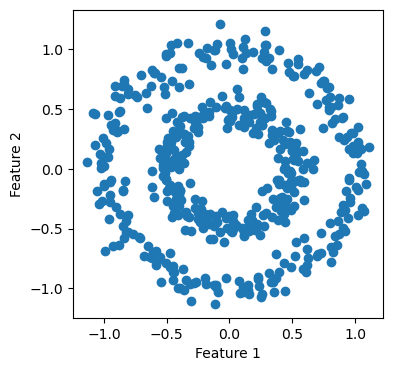

In [ ]:
np.random.seed(42)

n = 500
X, y = make_circles(n_samples=n, shuffle=True, noise=0.07, random_state=None, factor = 0.5)

fig, ax = plt.subplots(1, figsize = (4, 4))
a = ax.scatter(X[:, 0], X[:, 1])
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
A = nbrs.kneighbors_graph().toarray()

# symmetrize the matrix
A = A + A.T
A[A > 1] = 1

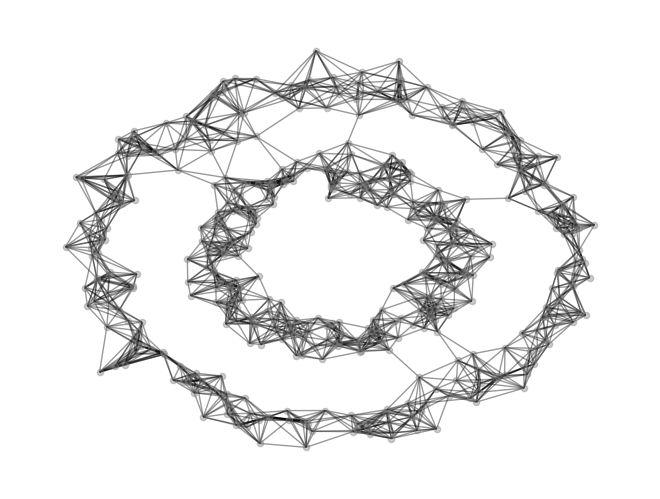

In [ ]:
import networkx as nx
from hidden_spectral import spectral 
spec  = spectral()
spec.plot_graph(X, A)

In [ ]:
# fig, axarr = plt.subplots(1, 2, figsize = (8, 4))
y_bad = np.random.randint(0, 2, n)

# plot_graph(X, A, z = y, ax = axarr[0])
# plot_graph(X, A, z = y_bad, ax = axarr[1])

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
def cut(A, z):
    D = pairwise_distances(z.reshape(-1, 1))
    return (A*D).sum()
    
print(f"good labels cut = {cut(A, z = y)}") 
print(f"bad labels cut = {cut(A, z = y_bad)}") 

def cut(A, z):
    D = pairwise_distances(z.reshape(-1, 1))
    return (A*D).sum()
    
print(f"good labels cut = {cut(A, z = y)}") 
print(f"bad labels cut = {cut(A, z = y_bad)}") 

good labels cut = 22.0
bad labels cut = 3000.0
good labels cut = 22.0
bad labels cut = 3000.0


# Use a theorem from linear algebra
$z$ should be the eigenvector with the second smallest eigenvalue of the matrix $$L = D^{-1}\left[ D-A \right]. $$ This matrix $L$ is called the normalized Laplacian.

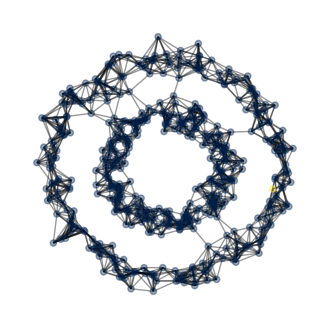

In [ ]:
from hidden_spectral import spectral 
spec = spectral()
fig, ax = plt.subplots(figsize = (4, 4))
z_ = spec.second_laplacian_eigenvector(A=A)
spec.plot_graph(X, A, z=z_, ax = ax, show_edge_cuts = False)

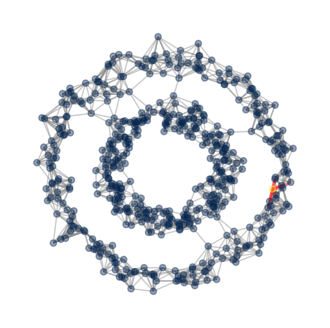

In [ ]:
z = z_ > 0
fig, ax = plt.subplots(figsize = (4, 4))
spec.plot_graph(X, A, z, show_edge_cuts = True, ax = ax)

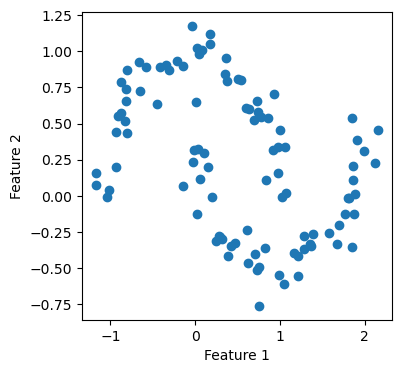

In [ ]:
from sklearn.datasets import make_moons

H, z = make_moons(n_samples=100, random_state=1, noise = .1)
fig, ax = plt.subplots(figsize = (4, 4))
a = ax.scatter(H[:, 0], H[:, 1])
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

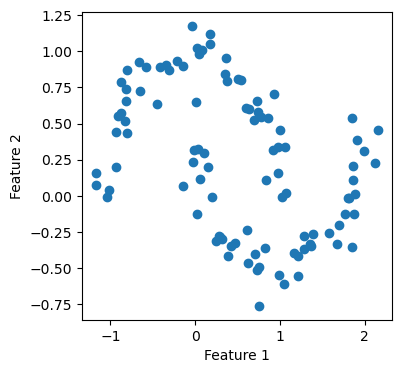

In [ ]:
fig, ax = plt.subplots(figsize = (4, 4))
z = spec.spectral_clustering(H, n_neighbors = 6)
a = ax.scatter(H[:, 0], H[:, 1], c = z, cmap = plt.cm.cividis)
a = ax.set(xlabel = "Feature 1", ylabel = "Feature 2")

$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2\;.$$

# Testing

In [ ]:

L = np.diag([4,5,22,2,3])
# print(L)
evalue, evector = np.linalg.eig(L)
print("evalue")
print(evalue)
print("evector")
print(evector)
k = L.shape[1] 
idx = evalue.argsort()[:k][::-1] 
evalue = evalue[idx]
evector = evector[:, idx]

print("evalue after change")
print(evalue)
print("evector after change")
print(evector)

index = evector.shape[1]
print("col")
print(evector[:,index-2])

evalue
[ 4.  5. 22.  2.  3.]
evector
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
evalue after change
[22.  5.  4.  3.  2.]
evector after change
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
col
[0. 0. 0. 0. 1.]
